In [49]:
import json
import pandas as pd
import numpy as np

In [50]:
with open("/Users/ashwinbaiju/Downloads/data_full.json") as f:
    data = json.loads(f.read())

In [99]:
train = pd.DataFrame.from_dict(data['train'])
val = pd.DataFrame.from_dict(data['val'])
test = pd.DataFrame.from_dict(data['test'])

In [101]:
train.columns = ['text','intent'] 
lst = ['restaurant_reservation','calories','nutrition_info','food_last', 'cook_time','ingredient_substitution','ingredients_list','meal_suggestion']
train = train[train.intent.isin(lst)]

In [53]:
train.intent.value_counts()

restaurant_reservation     100
nutrition_info             100
food_last                  100
cook_time                  100
ingredient_substitution    100
calories                   100
ingredients_list           100
meal_suggestion            100
Name: intent, dtype: int64

In [54]:
val.columns = ['text','intent']
val = val[val.intent.isin(lst)]
val.intent.value_counts()

restaurant_reservation     20
nutrition_info             20
food_last                  20
cook_time                  20
ingredient_substitution    20
calories                   20
ingredients_list           20
meal_suggestion            20
Name: intent, dtype: int64

In [103]:
test.columns = ['text','intent']
test = test[test.intent.isin(lst)]
test.intent.value_counts()

restaurant_reservation     30
nutrition_info             30
food_last                  30
cook_time                  30
ingredient_substitution    30
calories                   30
ingredients_list           30
meal_suggestion            30
Name: intent, dtype: int64

The dataset was pre-divided into training, validation and test data such that training data had 100 samples for the 8 intents chosen and the validation and test datasets had 20 and 30 samples respectively.

In [56]:
train.head()

,text,intent
2400,you need to call the melt in lakewood for a ta...,restaurant_reservation
2401,"hey computer, make a reservation for 2 for my ...",restaurant_reservation
2402,i think we should reserve dad's regular table ...,restaurant_reservation
2403,"listen i need to get a reservation for , me an...",restaurant_reservation
2404,can you make me a reservation for 4 pm on the ...,restaurant_reservation


# Data Exploration

## Number of characters per text

<b>To see the nature of chat texts in the dataset, some preliminary data exploration is done. First, to find the density of chat texts in the data, the number of characters in each text line is explored in a histogram.</b>

<AxesSubplot:>

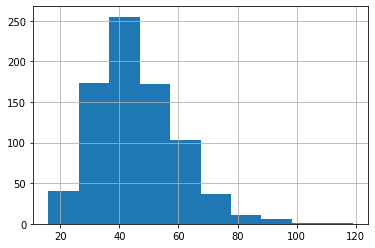

In [57]:
train['text'].str.len().hist()

## Word length distribution of texts

<b>Next, it is important to know the number of words in each sentence or text in the dataset. Therefore, a histogram is plotted that gives an idea on how long the sentences are in the dataset.
Here, it can be seen that the sentences in the data are mostly not too long. Most sentences are in the range of 7-8 words.</b>

<AxesSubplot:>

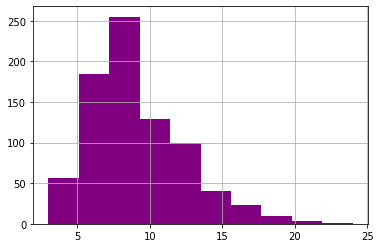

In [58]:
train['text'].str.split().map(lambda x: len(x)).hist(color='purple')

## Stopwords distribution in the chat texts

<b>Stopwords are connecting words used in any language that are necessary but does not contribute any value for learning to a machine learning algorithm. The number of such stopwords in the dataset is analysed below and the bar graph sheds light onto which stopwords are most common in this dataset.</b>

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashwinbaiju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


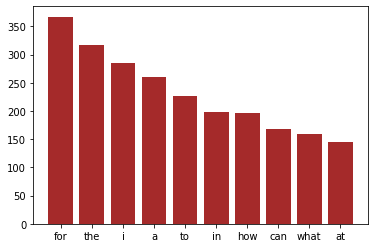

In [59]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

collection = []
tex = train['text'].str.split()
tex = tex.values.tolist()
collection = [word for i in tex for word in i]
from collections import defaultdict
dic = defaultdict(int)
for word in collection:
    if word in stop_words:
        dic[word]+=1
            
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x, y = zip(*top)
plt.bar(x, y, color='brown')
plt.show()

## Most common words in the dataset

<b>Lastly, it is interesting to find out which words are most commonly used in the dataset excluding stopwords. Therefore, bar graph is used to plot the most commonly occuring words in the dataset and their counts.</b>

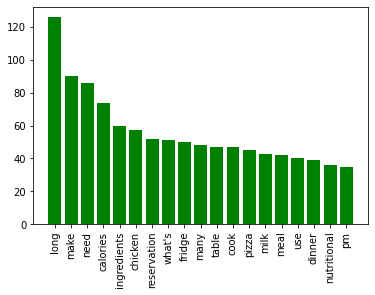

In [60]:
from collections import Counter

count = Counter(collection)
common = count.most_common()
x = []
y = []
for word,count in common[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)

plt.bar(x=x, height=y, color='green')
plt.xticks(rotation='vertical')
plt.show()

Naturally, it can be seen that some of the most common words in the dataset are 'calories' and 'ingredients'.

# Text Preprocessing

In [61]:
# basic preprocessing
import re

train['text_processed'] = list(map(lambda x:re.sub('[,\.!?]', '', x),train['text'])) # removing all symbols
train['text_processed'] = list(map(lambda x:x.lower(), train['text_processed']))     # lowercasing if any uppercase

In [62]:
train.head()

,text,intent,text_processed
2400,you need to call the melt in lakewood for a ta...,restaurant_reservation,you need to call the melt in lakewood for a ta...
2401,"hey computer, make a reservation for 2 for my ...",restaurant_reservation,hey computer make a reservation for 2 for my p...
2402,i think we should reserve dad's regular table ...,restaurant_reservation,i think we should reserve dad's regular table ...
2403,"listen i need to get a reservation for , me an...",restaurant_reservation,listen i need to get a reservation for me and...
2404,can you make me a reservation for 4 pm on the ...,restaurant_reservation,can you make me a reservation for 4 pm on the ...


In [63]:
import spacy
import gensim
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [64]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp("".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [65]:
lemmed_list = lemmatization(train['text_processed'].tolist(), allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [66]:
train['lemmatized_text'] = lemmed_list

In [67]:
train.head()

,text,intent,text_processed,lemmatized_text
2400,you need to call the melt in lakewood for a ta...,restaurant_reservation,you need to call the melt in lakewood for a ta...,"[need, call, melt, lakewood, table, first, week]"
2401,"hey computer, make a reservation for 2 for my ...",restaurant_reservation,hey computer make a reservation for 2 for my p...,"[computer, make, reservation, parent, red, lob..."
2402,i think we should reserve dad's regular table ...,restaurant_reservation,i think we should reserve dad's regular table ...,"[think, reserve, dad, regular, table, people, ..."
2403,"listen i need to get a reservation for , me an...",restaurant_reservation,listen i need to get a reservation for me and...,"[listen, need, get, reservation, pm]"
2404,can you make me a reservation for 4 pm on the ...,restaurant_reservation,can you make me a reservation for 4 pm on the ...,"[make, reservation, pm, 22nd, ruth]"


In [68]:
from sklearn.preprocessing import LabelEncoder
intent_le = LabelEncoder()

y_train = intent_le.fit_transform(train.intent.values)
y_val = intent_le.fit_transform(val.intent.values)
y_test = intent_le.fit_transform(test.intent.values)

# TF-IDF vectorization

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=10000, ngram_range=(1,1))

In [70]:
tfidf_vectorizer.fit(train.text)

TfidfVectorizer(max_features=10000)

In [71]:
train_idf = tfidf_vectorizer.transform(train.text)
val_idf = tfidf_vectorizer.transform(val.text)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

Svm = SVC(gamma=0.5)
lr = LogisticRegression()
mnb = MultinomialNB()

## Gamma was tuned to 0.5

<b>The first validation run of C-Support Vector Classification was done with a gamma parameter of 'auto' and returned a near 93% accuracy. By further tuning of the hyperparameter by trial-and-error, gamma was changed to '0.5'. This resulted in an improved accuracy of over 96% and managed to outperform every other machine learning algorithm used in the tests

In [73]:
Svm.fit(train_idf, y_train)
lr.fit(train_idf, y_train)
mnb.fit(train_idf, y_train)

MultinomialNB()

In [74]:
from sklearn.metrics import accuracy_score

print('Prediction accuracy of SVM with TF-IDF : ', accuracy_score(y_true=y_val ,y_pred=Svm.predict(val_idf)))
print('Prediction accuracy of Logistic Regression with TF-IDF : ', \
      accuracy_score(y_true=y_val ,y_pred=lr.predict(val_idf)))
print('Prediction accuracy of Multinomial Naive Bayes with TF-IDF : ', \
      accuracy_score(y_true=y_val ,y_pred=mnb.predict(val_idf)))

Prediction accuracy of SVM with TF-IDF :  0.9625
Prediction accuracy of Logistic Regression with TF-IDF :  0.95625
Prediction accuracy of Multinomial Naive Bayes with TF-IDF :  0.93125


In [75]:
from sklearn.metrics import confusion_matrix

def cmatrix_tfidf(model, test_data):
    test_set = tfidf_vectorizer.transform(test_data.text)
    y_test = intent_le.fit_transform(test_data.intent.values)
    Y_pred = model.predict(test_set)
    return confusion_matrix(y_true=y_test, y_pred=Y_pred)        

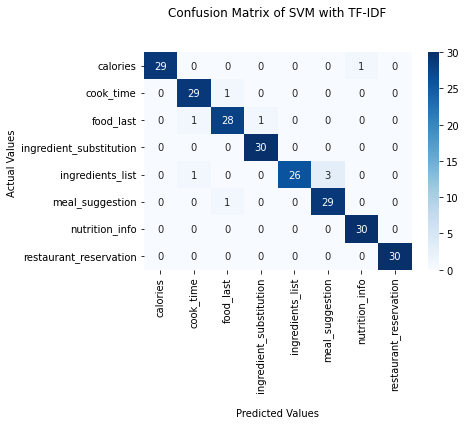

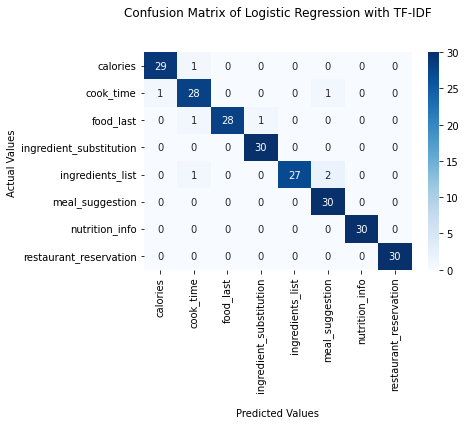

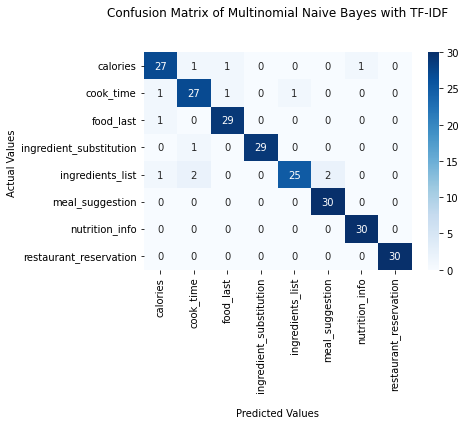

In [76]:
import seaborn as sns

models = [('SVM',Svm),('Logistic Regression',lr),('Multinomial Naive Bayes',mnb)]

for name,model in models:
    ax = sns.heatmap(cmatrix_tfidf(model, test), annot=True, cmap='Blues')

    ax.set_title(f'Confusion Matrix of {name} with TF-IDF\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(sorted(lst), rotation='vertical')
    ax.yaxis.set_ticklabels(sorted(lst), rotation='horizontal')

    plt.show()

# Doc2Vec for vectorization

In [77]:
import multiprocessing
num_cores = multiprocessing.cpu_count()

from gensim.models.doc2vec import TaggedDocument,Doc2Vec
from gensim.utils import simple_preprocess

In [78]:
training_corpus = []
for i, text in enumerate(train.text):
    tagged_text = TaggedDocument(simple_preprocess(text), [i])
    training_corpus.append(tagged_text)

In [79]:
%%time
doc2vec_model = Doc2Vec(vector_size=300, min_count=1, workers=num_cores, epochs=30)
doc2vec_model.build_vocab(training_corpus)
doc2vec_model.train(training_corpus, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

CPU times: user 832 ms, sys: 21 ms, total: 853 ms
Wall time: 850 ms


The training started off with minimum word frequency to be considered at 2 and 20 epochs.

In [80]:
doc2vectorized_textlist = []
for text in train.text:
    doc2vectorized_textlist.append(doc2vec_model.infer_vector(simple_preprocess(text), epochs=20))

In [81]:
from sklearn.neural_network import MLPClassifier

X_train = np.asarray(doc2vectorized_textlist)
y_train = intent_le.fit_transform(train.intent.values)
mlp = MLPClassifier(hidden_layer_sizes=(100,18), activation='relu',\
                    solver='lbfgs', max_iter=10000)

In [82]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 18), max_iter=10000, solver='lbfgs')

In [83]:
val_list = []
for text in val.text:
    val_list.append(doc2vec_model.infer_vector(simple_preprocess(text), epochs=30))
    
X_val = np.asarray(val_list)
y_val = intent_le.fit_transform(val.intent.values)

print('Prediction accuracy of Multi-layer Perceptron with doc2vec : ', accuracy_score(y_true=y_val ,y_pred=mlp.predict(X_val)))

Prediction accuracy of Multi-layer Perceptron with doc2vec :  0.85


The validation accuracy started off in low 60s percentage, but by taking every word into consideration by reducing 'min_count' to 1 and increasing the epochs to 30, it was possible to increase the accuracy to 80%.

# Experiment Testing

### n-grams and stopwords choices

The vectorization was first done with the removal of stopwords. But since the dataset is not too large and performance was not an issue, stopwords were not chosen to be removed from vectorization. This is because including stopwords in the data improved the accuracy of prediction of all chosen machine learning algorithms. The comparison can be seen below

In [84]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

tfidf_vectorizer1 = TfidfVectorizer(lowercase= True, max_features=10000, ngram_range=(1,1))
tfidf_vectorizer2 = TfidfVectorizer(lowercase= True, max_features=10000, ngram_range=(1,2))
tfidf_vectorizer3 = TfidfVectorizer(lowercase= True, max_features=10000, stop_words=ENGLISH_STOP_WORDS)
tfidf_vectorizer4 = TfidfVectorizer(lowercase= True, max_features=10000, stop_words=ENGLISH_STOP_WORDS, \
                                   ngram_range=(1,2))

In [85]:
tfidf_vectorizer1.fit(train.text)
tfidf_vectorizer2.fit(train.text)
tfidf_vectorizer3.fit(train.text)
tfidf_vectorizer4.fit(train.text)

train_idf1 = tfidf_vectorizer1.transform(train.text)
train_idf2 = tfidf_vectorizer2.transform(train.text)
train_idf3 = tfidf_vectorizer3.transform(train.text)
train_idf4 = tfidf_vectorizer4.transform(train.text)

In [86]:
test_idf1  = tfidf_vectorizer1.transform(test.text)
test_idf2  = tfidf_vectorizer2.transform(test.text)
test_idf3  = tfidf_vectorizer3.transform(test.text)
test_idf4  = tfidf_vectorizer4.transform(test.text)

testframes = [(train_idf1,test_idf1),(train_idf2,test_idf2),(train_idf3,test_idf3),(train_idf4,test_idf4)]

<AxesSubplot:title={'center':'Accuracy scores with preprocessing techniques'}>

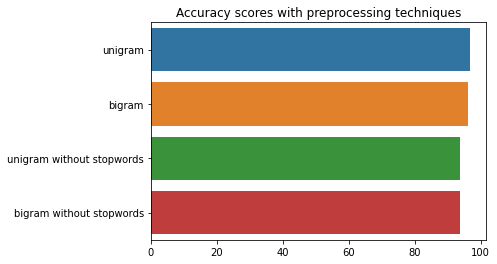

In [87]:
x = []
y = ['unigram','bigram','unigram without stopwords','bigram without stopwords']
for train,test in testframes:
    lr.fit(train,y_train)
    x.append(100*accuracy_score(y_true=y_test,y_pred=lr.predict(test)))

plt.title('Accuracy scores with preprocessing techniques')
sns.barplot(x=x,y=y)

Intent prediction accuracy is tested with logistic regression using 4 combinations of use of n-grams and stopwords. When the above plot is observed, it can be seen that omitting stopwords from training managed only to drop the prediction accuracy of the model. Usage of bigrams did not improve the accuracy of prediction either.

### NLP algorithms testing

The algorithms chosen for comparison on this dataset were Support Vector Machine (C-Support Vector Classification), Logistic Regression and Multinomial Naive Bayes.
Support Vector Machine was chosen because of its natural ability to avoid overfitting and ease of hyperparameter selection. SVMs tend to learn the feature space quite accurately with its default hyperparameters in most situations and this characteristic was thought to useful for this text classification scenario.

Logistic regression was chosen as one of the algorithms as a good middle-ground among the three chosen as it is not one of the more traditionally sought-after algorithms for NLP tasks. Therefore, it is believed to give a good comparitive analysis between models that are frequently used for NLP problems and those that are not.

Multinomial Naive Bayes is one of the most used algorithms when it comes to any NLP problem. This is because of its mathematics dealing with probabilities and the probabilities of certain words coming after certain others is learnt by this model which makes it an effective tool for prediction of text classification. 

In [89]:
test = pd.DataFrame.from_dict(data['test'])
test.columns = ['text','intent']
test = test[test.intent.isin(lst)]

In [94]:
from sklearn.metrics import classification_report

test_idf = tfidf_vectorizer.transform(test.text)
lr.fit(train_idf, y_train)
print("Classification report of SVM\n", classification_report(y_true=y_test,y_pred=Svm.predict(test_idf)))
print("\n\nClassification report of Logistic Regression\n", \
      classification_report(y_true=y_test,y_pred=lr.predict(test_idf)))
print("\n\nClassification report of Multinomial Naive Bayes\n", \
      classification_report(y_true=y_test,y_pred=mnb.predict(test_idf)))

Classification report of SVM
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.94      0.97      0.95        30
           2       0.93      0.93      0.93        30
           3       0.97      1.00      0.98        30
           4       1.00      0.87      0.93        30
           5       0.91      0.97      0.94        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



Classification report of Logistic Regression
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.90      0.93      0.92        30
           2       1.00      0.93      0.97        30
           3       0.97      1.00      0.98        30


It is evident from the classification report that although all models are performing really well at predicting the intent of texts, Logistic Regression and SVM are slightly outperforming Naive Bayes classifier.
The possible reason for Naive Bayes not performing as well is maybe due to the presence of vectors for stopwords as well which may be making the model double count certain features and ruining the probability calculations.

### Vectorization Techniques testing

TF-IDF and Doc2Vec were the two vectorization techniques chosen to transform the strings into numerical form factor for the models to learn.
The reason for choosing these two was to compare a more traditional, pure conversion of words to numerical form by analysing the frequency of occurrence and presence of words in the corpus (TF-IDF) with a modern vectorization technique where the vectors are contextually aware of other words in a hyperdimensional space (Doc2Vec).

Doc2Vec was chosen over Word2Vec due its ease of converting whole chat texts to numerical vectors where Word2Vec might have to find an average of words in a text to make a feature matrix that is shaped in the appropriate form for models to learn.


Accuracy of prediction (Doc2Vec) =  0.8625


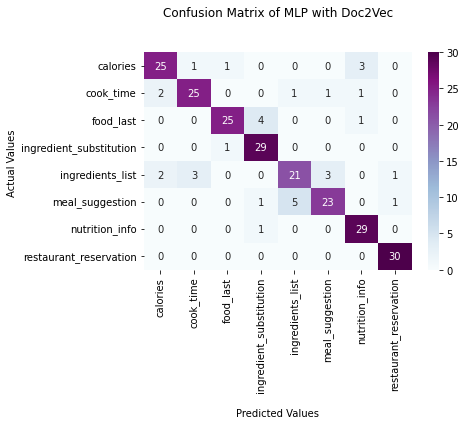


Accuracy of prediction (TF-IDF) =  0.9625


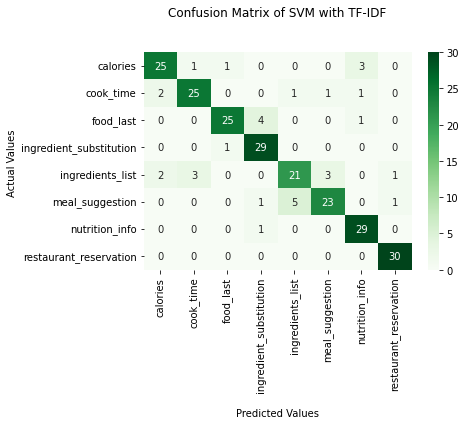

In [95]:
# The training model used is provided below for reference
# doc2vec_model = Doc2Vec(vector_size=300, min_count=1, workers=num_cores, epochs=30)

test_list = []
for text in test.text:
    test_list.append(doc2vec_model.infer_vector(simple_preprocess(text), epochs=30))
    
X_test = np.asarray(test_list)

cm = confusion_matrix(y_true=y_test,y_pred=mlp.predict(X_test))
ax1 = sns.heatmap(cm, annot=True, cmap='BuPu')
ax1.set_title(f'Confusion Matrix of MLP with Doc2Vec\n\n');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(sorted(lst), rotation='vertical')
ax1.yaxis.set_ticklabels(sorted(lst), rotation='horizontal')
print("\nAccuracy of prediction (Doc2Vec) = ",accuracy_score(y_true=y_test,y_pred=mlp.predict(X_test)))
plt.show()

cm1 = confusion_matrix(y_true=y_test,y_pred=Svm.predict(test_idf))
ax2 = sns.heatmap(cm, annot=True, cmap='Greens')
ax2.set_title(f'Confusion Matrix of SVM with TF-IDF\n\n');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');
ax2.xaxis.set_ticklabels(sorted(lst), rotation='vertical')
ax2.yaxis.set_ticklabels(sorted(lst), rotation='horizontal')
print("\nAccuracy of prediction (TF-IDF) = ",accuracy_score(y_true=y_test,y_pred=Svm.predict(test_idf)))
plt.show()

Observing the above confusion matrices shows that the Doc2Vec vectorization learnt by a Multilayer Perceptron is making more errors in predicting intent of chat texts than the traditional TF-IDF learnt by SVM.
This proves that when dealing with a small corpus with small texts, the contextuality advantage of Doc2Vec vectorization is not providing any benefit in this text classification problem. Another possible reason for this is that the Doc2Vec model was trained on this small dataset and if it could be trained with a larger corpus of restaurant related words, the benefits of contextual awareness may have started to show in the prediction accuracy.

### Hyperparameter Tuning

The first validation run of C-Support Vector Classification was done with a gamma parameter of 'auto' and returned a near 93% accuracy. By further tuning of the hyperparameter by trial-and-error, gamma was changed to '0.5'. This resulted in an improved accuracy of over 96% and managed to outperform every other machine learning algorithm used in the tests

In [96]:
Svm1 = SVC(gamma='auto')
Svm2 = SVC(gamma=0.5)

Svm1.fit(train_idf, y_train)
Svm2.fit(train_idf, y_train)

print("Accuracy scores of SVM before and after adjusting gamma are ", \
     100*accuracy_score(y_true=y_test,y_pred=Svm1.predict(test_idf)), "and ", \
     100*accuracy_score(y_true=y_test,y_pred=Svm2.predict(test_idf)), "respectively")

Accuracy scores of SVM before and after adjusting gamma are  88.33333333333333 and  96.25 respectively


In [97]:
mlp1 = MLPClassifier(hidden_layer_sizes=(12,6), activation='relu', max_iter=1000)
mlp2 = MLPClassifier(hidden_layer_sizes=(100,18), activation='relu',\
                    solver='lbfgs', max_iter=10000)

mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

print("Accuracy scores of MLP before and after adjusting hyperparameters are ", \
      100*accuracy_score(y_true=y_test,y_pred=mlp1.predict(X_test)), "and ", \
      100*accuracy_score(y_true=y_test,y_pred=mlp2.predict(X_test)), "respectively")

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy scores of MLP before and after adjusting hyperparameters are  77.91666666666667 and  87.91666666666667 respectively


In [104]:
doc2vec_model1 = Doc2Vec(vector_size=300, min_count=2, workers=num_cores, epochs=20)
doc2vec_model1.build_vocab(training_corpus)
doc2vec_model1.train(training_corpus, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

doc2vec_model2 = Doc2Vec(vector_size=300, min_count=1, workers=num_cores, epochs=30)
doc2vec_model2.build_vocab(training_corpus)
doc2vec_model2.train(training_corpus, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

vectorlist1 = []
for text in train.text:
    vectorlist1.append(doc2vec_model1.infer_vector(simple_preprocess(text), epochs=20))
    
vectorlist2 = []
for text in train.text:
    vectorlist2.append(doc2vec_model2.infer_vector(simple_preprocess(text), epochs=30))
    
testlist1 = []
for text in test.text:
    testlist1.append(doc2vec_model1.infer_vector(simple_preprocess(text), epochs=20))
    
testlist2 = []
for text in test.text:
    testlist2.append(doc2vec_model2.infer_vector(simple_preprocess(text), epochs=30))
    
X_train1 = np.asarray(vectorlist1)
X_train2 = np.asarray(vectorlist2)
X_test1 = np.asarray(testlist1)
X_test2 = np.asarray(testlist2)

mlp.fit(X_train1,y_train)
print('Accuracy score before tuning : ',100*accuracy_score(y_true=y_test,y_pred=mlp.predict(X_test1)))
mlp.fit(X_train2,y_train)
print('Accuracy score after tuning : ',100*accuracy_score(y_true=y_test,y_pred=mlp.predict(X_test2)))

Accuracy score before tuning :  78.75
Accuracy score after tuning :  85.41666666666666


## The intent classification is best effective and efficient by using the combination of TF-IDF vectorization with Support Vector Machine as its learning algorithm